0. Setting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
data=pd.read_csv("C:/Users/강민채/Desktop/KUBIG/ML/self/week 3/HousingData.csv")

1. EDA

In [4]:
data.head()
# 행 index는 보스턴 내 지역들

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

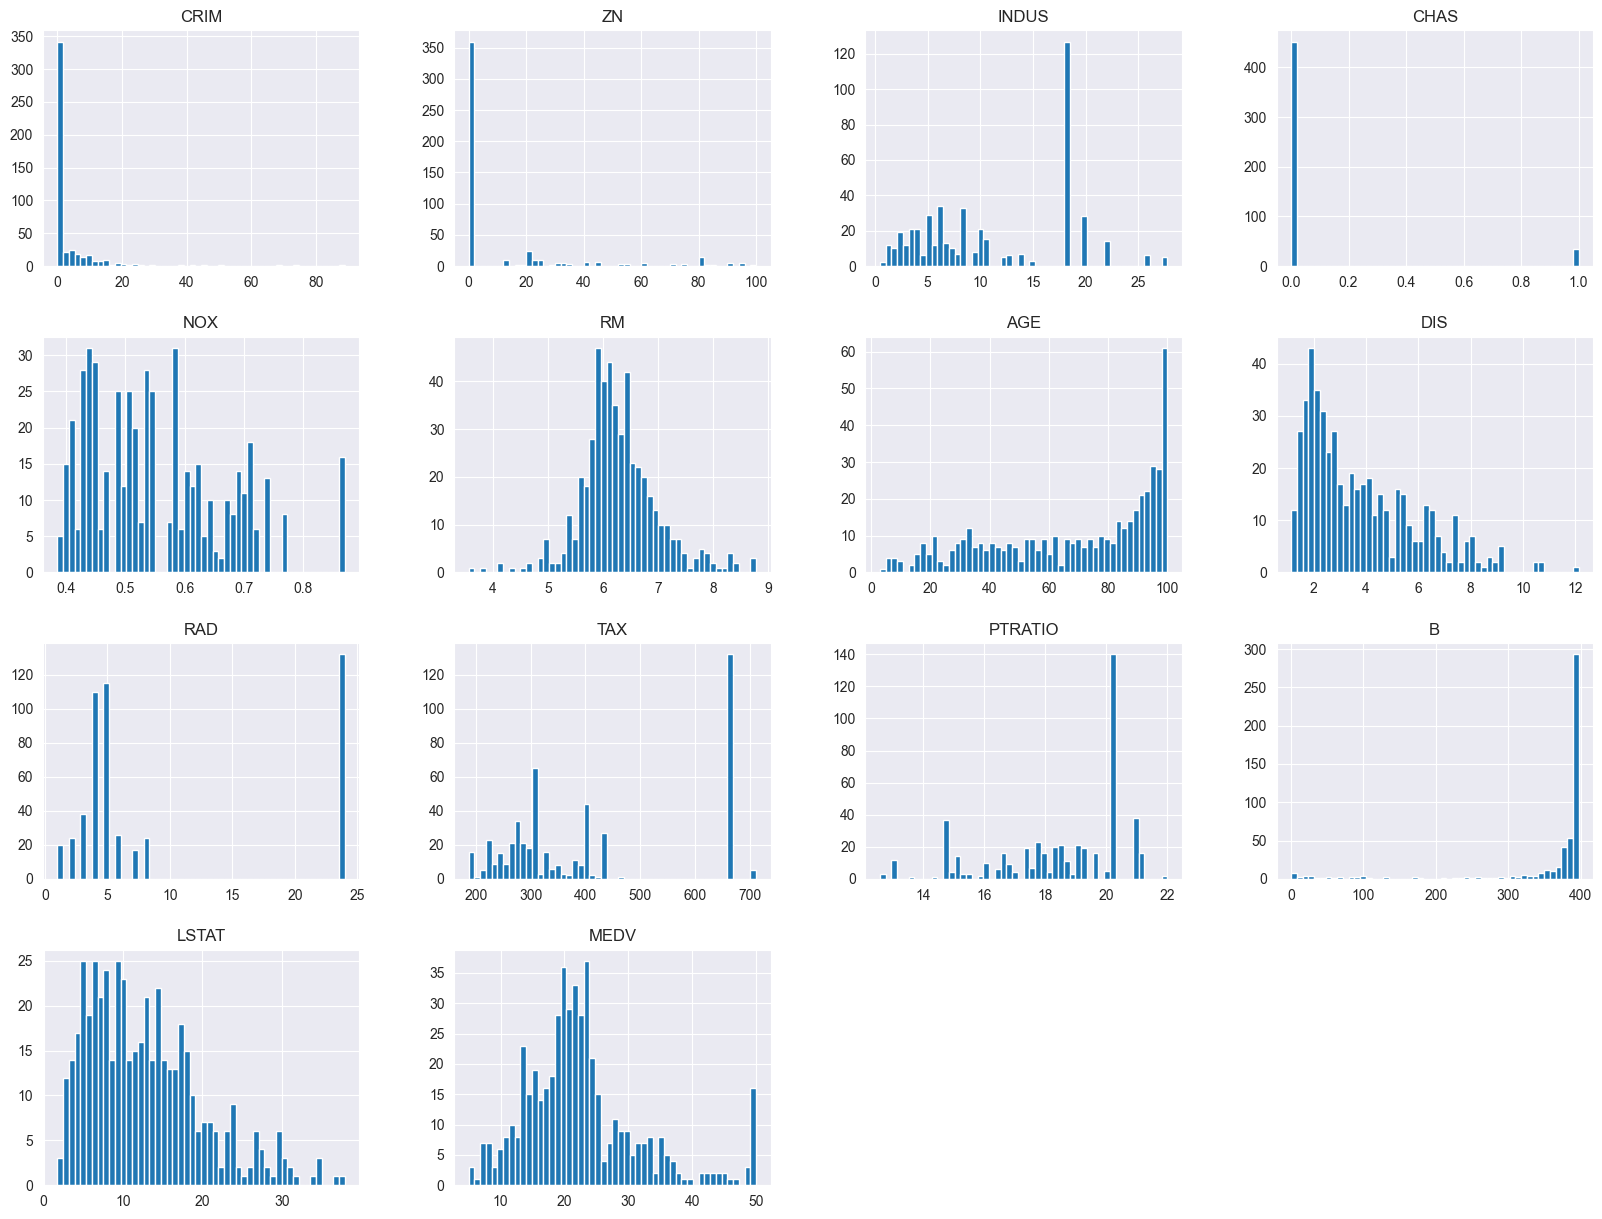

In [7]:
# feature 별 시각화
data.hist(bins=50, figsize=(20,15))

,CRIM,MEDV
CRIM,1.000000,-0.391363
MEDV,-0.391363,1.000000


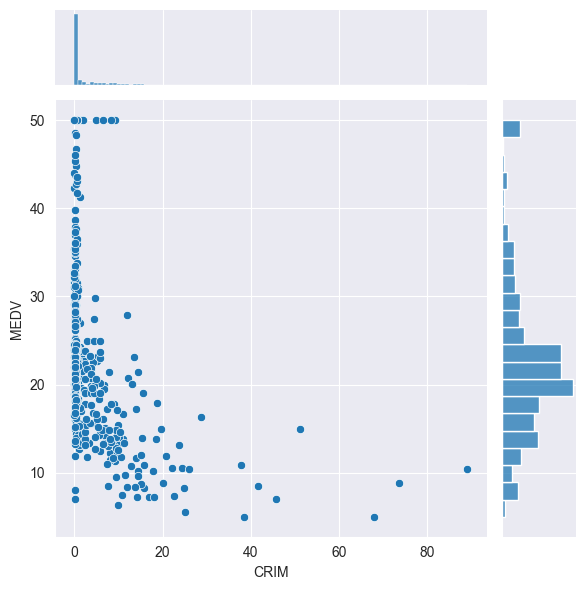

In [8]:
# CRIM 자치시 별 1인당 범죄율에 따른 주택 가격 차이 비교
sns.jointplot(x=data['CRIM'],y=data['MEDV'],kind='scatter')

# CRIM=0 인 지역들 간에도 주택 가격 차이가 심함
# CRIM이 높을수록 MEDV는 낮아지는 경향은 있음.
data[['CRIM','MEDV']].corr()

CHAS
0.0    22.215044
1.0    28.826471
Name: MEDV, dtype: float64


<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

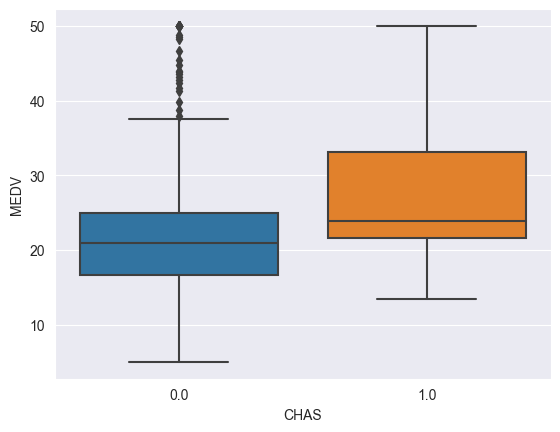

In [14]:
# CHAS 찰스강 부근인지에 따른 주택 가격 차이 비교
data.groupby('CHAS')['MEDV'].mean()    # 강 근처인 주택 가격 평균이 높음
 
sns.boxplot(x='CHAS',y='MEDV',data=data)

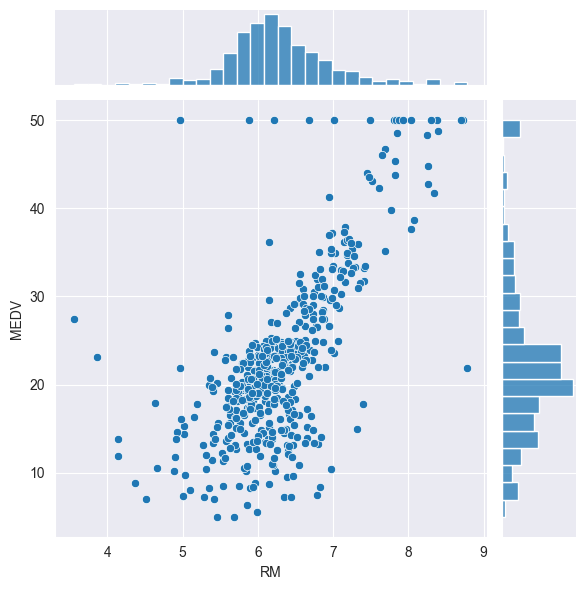

In [16]:
# RM 평균 방의 개수별 주택 가격 차이 비교
sns.jointplot(x=data['RM'],y=data['MEDV'],kind='scatter')

# 강한 양의 상관관계 확인 가능
data[['RM','MEDV']].corr()

MEDV       1.000000
RM         0.482829
ZN         0.345417
DIS        0.313115
B          0.126955
CHAS       0.122997
RAD       -0.248115
NOX       -0.394995
AGE       -0.395213
PTRATIO   -0.398789
CRIM      -0.408125
TAX       -0.414650
INDUS     -0.415193
LSTAT     -0.669278
Name: MEDV, dtype: float64

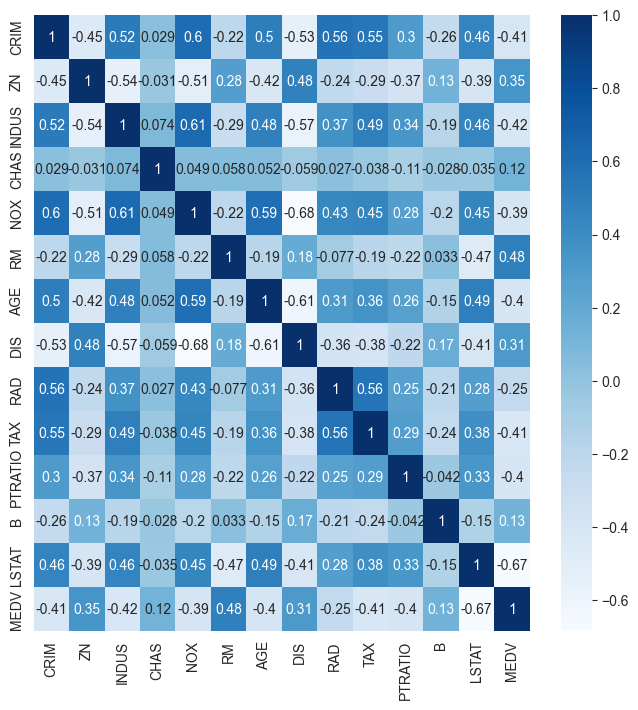

In [19]:
# 모든 변수와 MEDV 의 상관성 분석
corr=data.corr(method='kendall')
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap='Blues')

corr['MEDV'].sort_values(ascending=False)

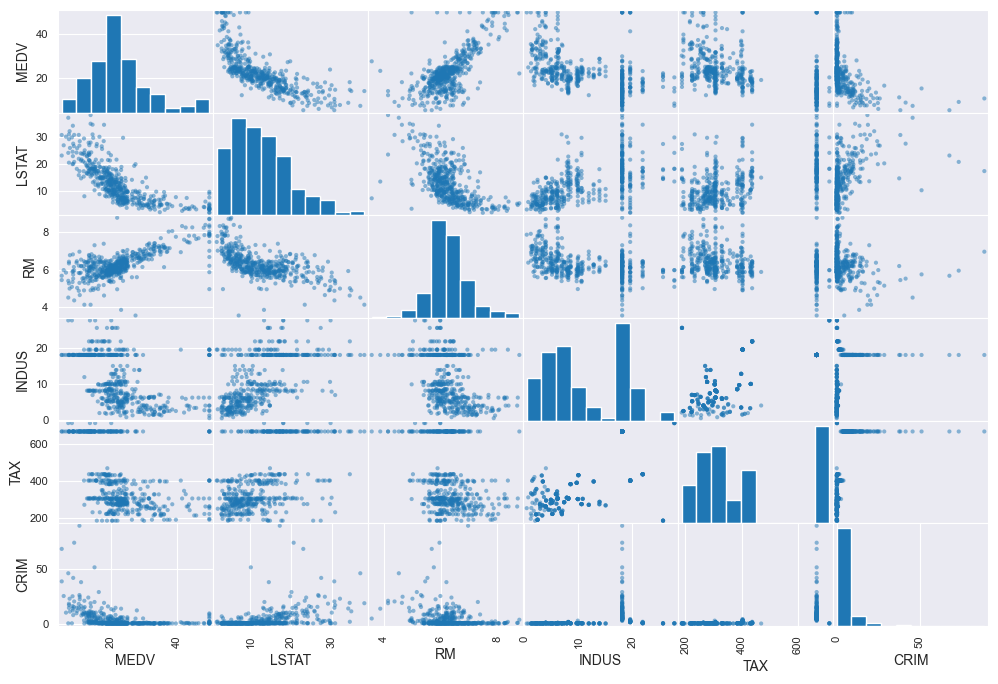

In [20]:
# 다중공선성 확인
from pandas.plotting import scatter_matrix
attributes=['MEDV','LSTAT','RM','INDUS','TAX','CRIM']
scatter_matrix(data[attributes],figsize=(12,8))
plt.show()

2. Data Prep

In [21]:
# 결측치 확인
incomplete_rows=data[data.isnull().any(axis=1)]
incomplete_rows.info()

# 결측치 처리
data.dropna(axis=0,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 4 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     92 non-null     float64
 1   ZN       92 non-null     float64
 2   INDUS    92 non-null     float64
 3   CHAS     92 non-null     float64
 4   NOX      112 non-null    float64
 5   RM       112 non-null    float64
 6   AGE      92 non-null     float64
 7   DIS      112 non-null    float64
 8   RAD      112 non-null    int64  
 9   TAX      112 non-null    int64  
 10  PTRATIO  112 non-null    float64
 11  B        112 non-null    float64
 12  LSTAT    92 non-null     float64
 13  MEDV     112 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 13.1 KB


<AxesSubplot:>

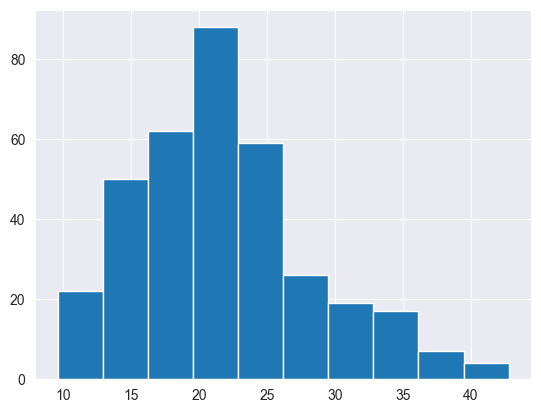

In [25]:
# Outlier 제거
p1=data['MEDV'].quantile(0.95)
p2=data['MEDV'].quantile(0.05)
data=data[(data['MEDV']<p1)&(data['MEDV']>p2)]
data['MEDV'].hist()

In [30]:
# 수치형 데이터 표준화
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_num=data.drop(['MEDV'],axis=1)
scaler.fit(X_num)
X_scaled=scaler.transform(X_num)
X_scaled=pd.DataFrame(X_scaled, index=X_num.index,columns=X_num.columns)

X=X_scaled
y=data['MEDV']

3-0. Train: data split

In [31]:
# train/test 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=30)

3-1. Train: Linear Regression

In [35]:
# Linear Regression
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
model=regressor_linear.fit(X_train, y_train)


In [43]:
# Linear Regression predict 결과

#r2 score
print('r2:', model.score(X_train,y_train))

#mse
pred=regressor_linear.predict(X_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_train,pred)

#rmse
rmse=np.sqrt(mse)

#mae
mae=mean_absolute_error(y_train,pred)

print('mse:' ,mse, 'rmse:',rmse, 'mae:',mae)


r2: 0.7809577056203612
mse: 9.637052928437962 rmse: 3.104360309055307 mae: 2.372406600835506


In [44]:
# Linear Regression 평가

#r2 score
print('r2_test:',model.score(X_test,y_test))

#mse
final_pred=regressor_linear.predict(X_test)
final_mse=mean_squared_error(y_test,final_pred)

#rmse
final_rmse=np.sqrt(final_mse)

#mae
final_mae=mean_absolute_error(y_test,final_pred)

print('final_mse:' ,final_mse, 'final_rmse:',final_rmse, 'final_mae:',final_mae)

r2_test: 0.6355178233288568
final_mse: 13.200594370431023 final_rmse: 3.633262221534667 final_mae: 2.431457200099914


Text(0, 0.5, 'prediction')

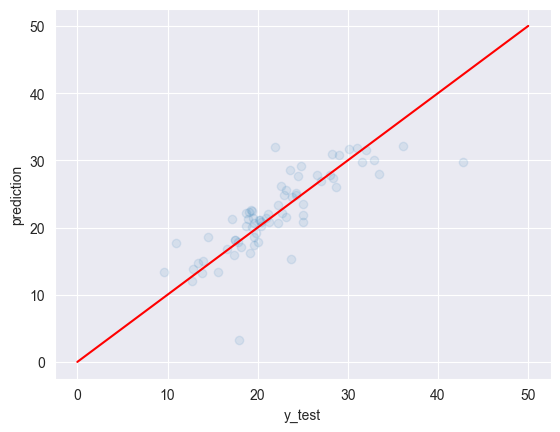

In [49]:
# Linear Regression 실제 값과 추측 값 scatterplot 시각화
plt.scatter(x=y_test,y=final_pred, alpha=0.1)
plt.plot([0,50],[0,50],'r-')
plt.xlabel('y_test')
plt.ylabel('prediction')


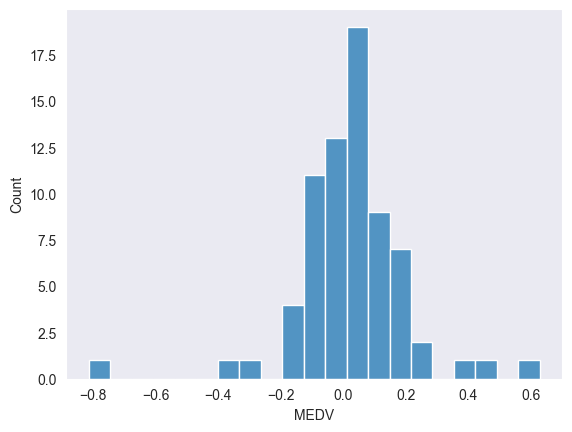

In [50]:
# Error 히스토그램 확인
err=(final_pred-y_test)/y_test
sns.histplot(err)
plt.grid()

3-2. Train: Ridge Regression

In [53]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly',PolynomialFeatures(degree=2)),
    ('model',Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
model2=ridge_pipe.fit(X_train, y_train)

In [55]:
# Ridge Regression predict 결과

#r2 score
print('r2_2:', model2.score(X_train,y_train))

#mse
pred2=ridge_pipe.predict(X_train)
mse2=mean_squared_error(y_train,pred2)

#rmse
rmse2=np.sqrt(mse2)

#mae
mae2=mean_absolute_error(y_train,pred2)

print('mse2:' ,mse2, 'rmse2:',rmse2, 'mae2:',mae2)


r2_2: 0.9335805419232527
mse2: 2.922211140896815 rmse2: 1.70944761279684 mae2: 1.2656135870533143


In [62]:
# Ridge Regression 평가

#r2 score
print('r2_2_test:',model2.score(X_test,y_test))

#mse
final_pred2=ridge_pipe.predict(X_test)
final_mse2=mean_squared_error(y_test,final_pred2)

#rmse
final_rmse2=np.sqrt(final_mse2)

#mae
final_mae2=mean_absolute_error(y_test,final_pred2)

print('final_mse2:' ,final_mse2, 'final_rmse2:',final_rmse2, 'final_mae2:',final_mae2)

r2_2_test: 0.8057882284296929
final_mse2: 7.033844128887429 final_rmse2: 2.652139537974469 final_mae2: 2.06683506946222


Text(0, 0.5, 'prediction')

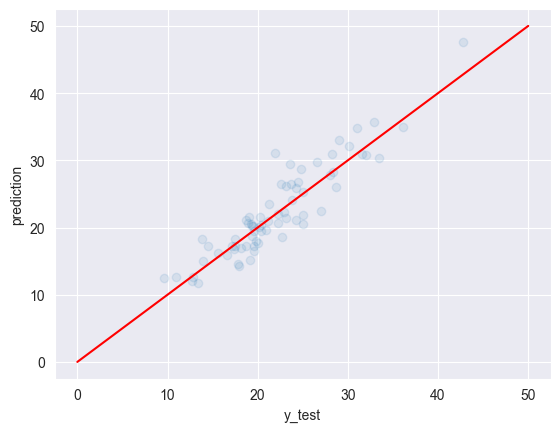

In [57]:
# Ridge Regression 실제 값과 추측 값 scatterplot 시각화
plt.scatter(x=y_test,y=final_pred2, alpha=0.1)
plt.plot([0,50],[0,50],'r-')
plt.xlabel('y_test')
plt.ylabel('prediction')


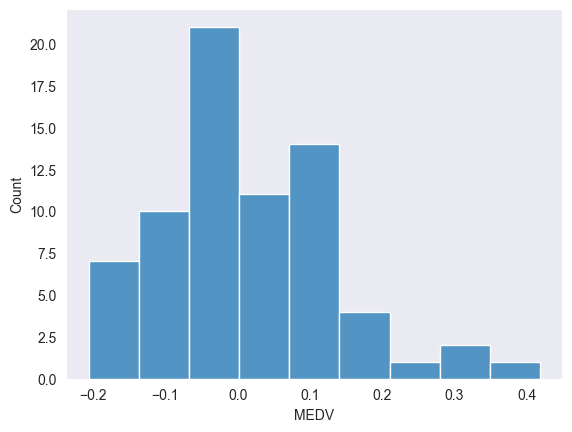

In [58]:
# Error 히스토그램 확인
err2=(final_pred2-y_test)/y_test
sns.histplot(err2)
plt.grid()

3-3. Train: Lasso Regression

In [60]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps3 = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps3)
model3=lasso_pipe.fit(X_train, y_train)

In [61]:
# Lasso Regression predict 결과

#r2 score
print('r2_3:', model3.score(X_train,y_train))

#mse
pred3=lasso_pipe.predict(X_train)
mse3=mean_squared_error(y_train,pred3)

#rmse
rmse3=np.sqrt(mse3)

#mae
mae3=mean_absolute_error(y_train,pred3)

print('mse3:' ,mse3, 'rmse3:',rmse3, 'mae3:',mae3)


r2_3: 0.9325416344664045
mse3: 2.9679192365764657 rmse3: 1.7227649974899264 mae3: 1.2896049032899966


In [63]:
# Lasso Regression 평가

#r2 score
print('r2_3_test:',model3.score(X_test,y_test))

#mse
final_pred3=lasso_pipe.predict(X_test)
final_mse3=mean_squared_error(y_test,final_pred3)

#rmse
final_rmse3=np.sqrt(final_mse3)

#mae
final_mae3=mean_absolute_error(y_test,final_pred3)

print('final_mse3:' ,final_mse3, 'final_rmse3:',final_rmse3, 'final_mae3:',final_mae3)

r2_3_test: 0.7875660733686203
final_mse3: 7.693803086862343 final_rmse3: 2.77377055411264 final_mae3: 2.112352848514529


Text(0, 0.5, 'prediction')

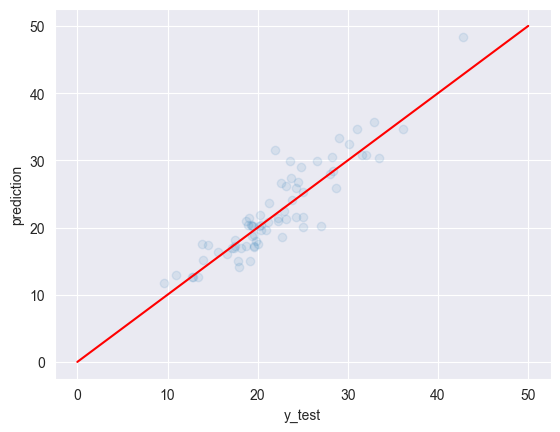

In [64]:
# Lasso Regression 실제 값과 추측 값 scatterplot 시각화
plt.scatter(x=y_test,y=final_pred3, alpha=0.1)
plt.plot([0,50],[0,50],'r-')
plt.xlabel('y_test')
plt.ylabel('prediction')

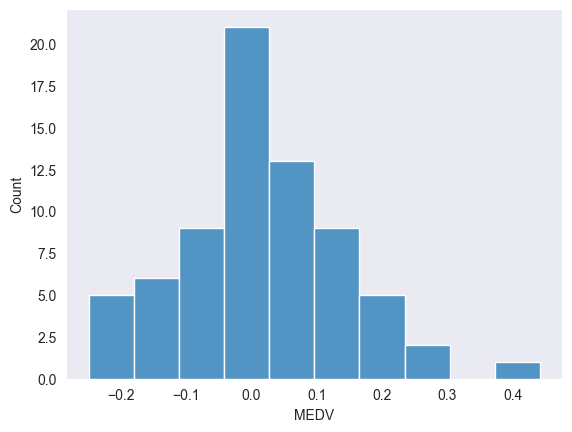

In [65]:
# Error 히스토그램 확인
err3=(final_pred3-y_test)/y_test
sns.histplot(err3)
plt.grid()

4. Conclusion

In [ ]:
# r2, rmse 비교
# linear : 0.64 , 3.63
# Ridge : 0.81 , 2.65
# Lasso: 0.79 , 2.77

# r2 : Ridge > Lasso > Linear (r2 score가 1에 가장 가까운 Ridge가 가장 좋은 모델)
# rmse : Linear > Lasso > Ridge  (rmse 값이 가장 작은 Ridge가 가장 좋은 모델)

# Error를 확인해 봤을 때도 Ridge가 제일 잘 적합